# data visualization and making machine learning logistic regression prediction about people have/not heart attack

# 1-import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2-data reading and getting general information


In [2]:
data=pd.read_csv('heart_2020_cleaned.csv')

In [3]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# 3-data visualization

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

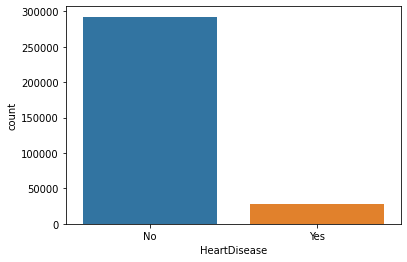

In [6]:
sns.countplot(data=data,x='HeartDisease')

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

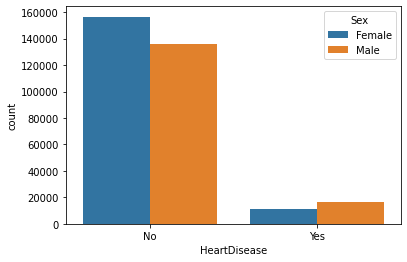

In [7]:
sns.countplot(data=data,x='HeartDisease',hue='Sex')

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

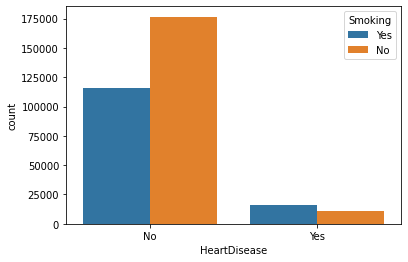

In [8]:
sns.countplot(data=data,x='HeartDisease',hue='Smoking')

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

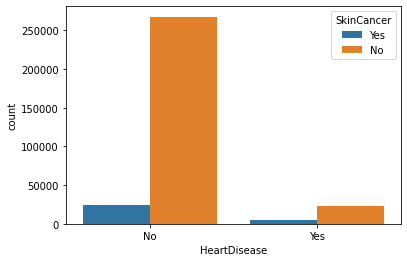

In [9]:
sns.countplot(data=data,x='HeartDisease',hue='SkinCancer')

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

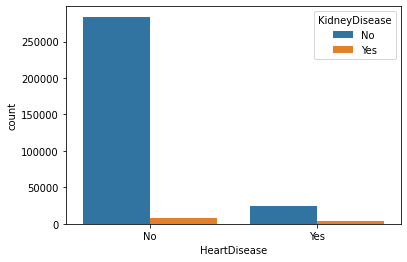

In [10]:
sns.countplot(data=data,x='HeartDisease',hue='KidneyDisease')

# data cleaning

In [11]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [12]:
s={'Yes':1,'No':0}
d={'Male':1,'Female':0}

In [13]:
data['Smoking']=data['Smoking'].map(s)
data['HeartDisease']=data['HeartDisease'].map(s)
data['AlcoholDrinking']=data['AlcoholDrinking'].map(s)
data['Stroke']=data['Stroke'].map(s)
data['DiffWalking']=data['DiffWalking'].map(s)
data['Diabetic']=data['Diabetic'].map(s)
data['PhysicalActivity']=data['PhysicalActivity'].map(s)
data['Asthma']=data['Asthma'].map(s)
data['KidneyDisease']=data['KidneyDisease'].map(s)
data['SkinCancer']=data['SkinCancer'].map(s)
data['Sex']=data['Sex'].map(d)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1.0,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0.0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1.0,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0.0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0.0,1,Very good,8.0,0,0,0


In [14]:
data['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [15]:
s=pd.get_dummies(data=data['Race'],drop_first=True)

In [16]:
data['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [17]:
v={'Poor':1,'Fair':2,'Excellent':3,'Good':4,'Very good':5}

In [18]:
data['GenHealth']=data['GenHealth'].map(v)

In [19]:
data=data.drop('Race',axis=1)

In [20]:
data=pd.concat([data,s],axis=1)

In [21]:
data['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [22]:
age={'25-29':27,'30-34':32,'35-39':37,'40-44':42,'18-24':21,'75-79':77,'45-49':47,'80 or older':85,'50-54':52,'55-59':57,'70-74':72,'60-64':62,'65-69':67}

In [23]:
data['AgeCategory']=data['AgeCategory'].map(age)

In [24]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Asian,Black,Hispanic,Other,White
0,0,16.60,1,0,0,3.0,30.0,0,0,57,...,5,5.0,1,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,85,...,5,7.0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,67,...,2,8.0,1,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,0,77,...,4,6.0,0,0,1,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42,...,5,8.0,0,0,0,0,0,0,0,1


<AxesSubplot: >

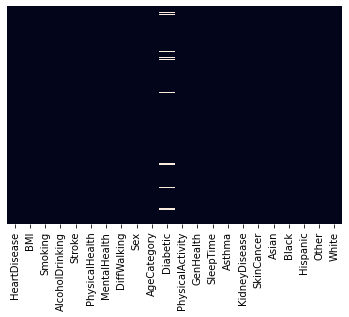

In [25]:
sns.heatmap(pd.isnull(data),cbar=False,yticklabels=False)

In [26]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Asian', 'Black', 'Hispanic', 'Other',
       'White'],
      dtype='object')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Diabetic          310455 non-null  float64
 11  PhysicalActivity  319795 non-null  int64  
 12  GenHealth         319795 non-null  int64  
 13  SleepTime         319795 non-null  float64
 14  Asthma            319795 non-null  int64  
 15  KidneyDisease     319795 non-null  int64  
 16  SkinCancer        31

In [28]:
data=data.dropna()

In [29]:
data=data.head(30000)

# SVM

In [30]:
y=data['HeartDisease']
x=data.drop('HeartDisease',axis=1)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=200)

# NORMALIZATION

In [33]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
x_train=mx.fit_transform(x_train)
x_test=mx.transform(x_test)

In [34]:
from sklearn import svm

In [35]:
svc=svm.SVC(decision_function_shape='ovo')

In [36]:
svc.fit(x_train,y_train)

SVC(decision_function_shape='ovo')

In [37]:
pre=svc.predict(x_test)

In [38]:
from sklearn.metrics import classification_report

In [39]:
svc.score(x_test,y_test)*100

91.68686868686868

In [40]:
#Score 91%